## <font color=#B2D732> <span style="background-color: #4424D6"> Imports

In [6]:
import sys,json
import glob, os
sys.path.append("/cerebro/cerebro1/dataset/bmpd/derivatives/HealthyControls_project/hc_project_analyses/code/")

from seed_to_voxels import Seed2voxels

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## <font color=#B2D732> <span style="background-color: #4424D6"> A/ Initialization

 ### <font color=#4424D6> I. Configuration & parameters </font >

In [7]:
# Load config file ------------------------------------------------------------
with open('../../config/config_seed2voxels.json') as config_file: # the notebook should be in 'xx/notebook/' folder #config_proprio
    config = json.load(config_file) # load config file should be open first and the path inside modified
    
seed_indiv=False


### <font color=#4424D6> II. Initialize class based on this </font>

In [8]:
seed2voxels=Seed2voxels(config,seed_indiv) # initialize the function

Start the analysis on: 31 participants
targeted voxel's group mask: MNI_GM_2mm
/cerebro/cerebro1/dataset/bmpd/derivatives/HealthyControls_project//hc_project_analyses/masks/brain/MNI_GM_2mm.nii.gz
/cerebro/cerebro1/dataset/bmpd/derivatives/HealthyControls_project//hc_project_analyses/masks/spinalcord/levels/icaps/atlas/icap_C6_D.nii.gz
/cerebro/cerebro1/dataset/bmpd/derivatives/HealthyControls_project//hc_project_analyses/masks/spinalcord/levels/icaps/atlas/icap_C6_V.nii.gz
/cerebro/cerebro1/dataset/bmpd/derivatives/HealthyControls_project//hc_project_analyses/masks/spinalcord/levels/icaps/atlas/icap_C6_I.nii.gz
/cerebro/cerebro1/dataset/bmpd/derivatives/HealthyControls_project//hc_project_analyses/masks/spinalcord/levels/icaps/atlas/icap_C7_D.nii.gz
/cerebro/cerebro1/dataset/bmpd/derivatives/HealthyControls_project//hc_project_analyses/masks/spinalcord/levels/icaps/atlas/icap_C7_V.nii.gz
/cerebro/cerebro1/dataset/bmpd/derivatives/HealthyControls_project//hc_project_analyses/masks/spin

## <font color=#B2D732> <span style="background-color: #4424D6"> B/ Create design matrix

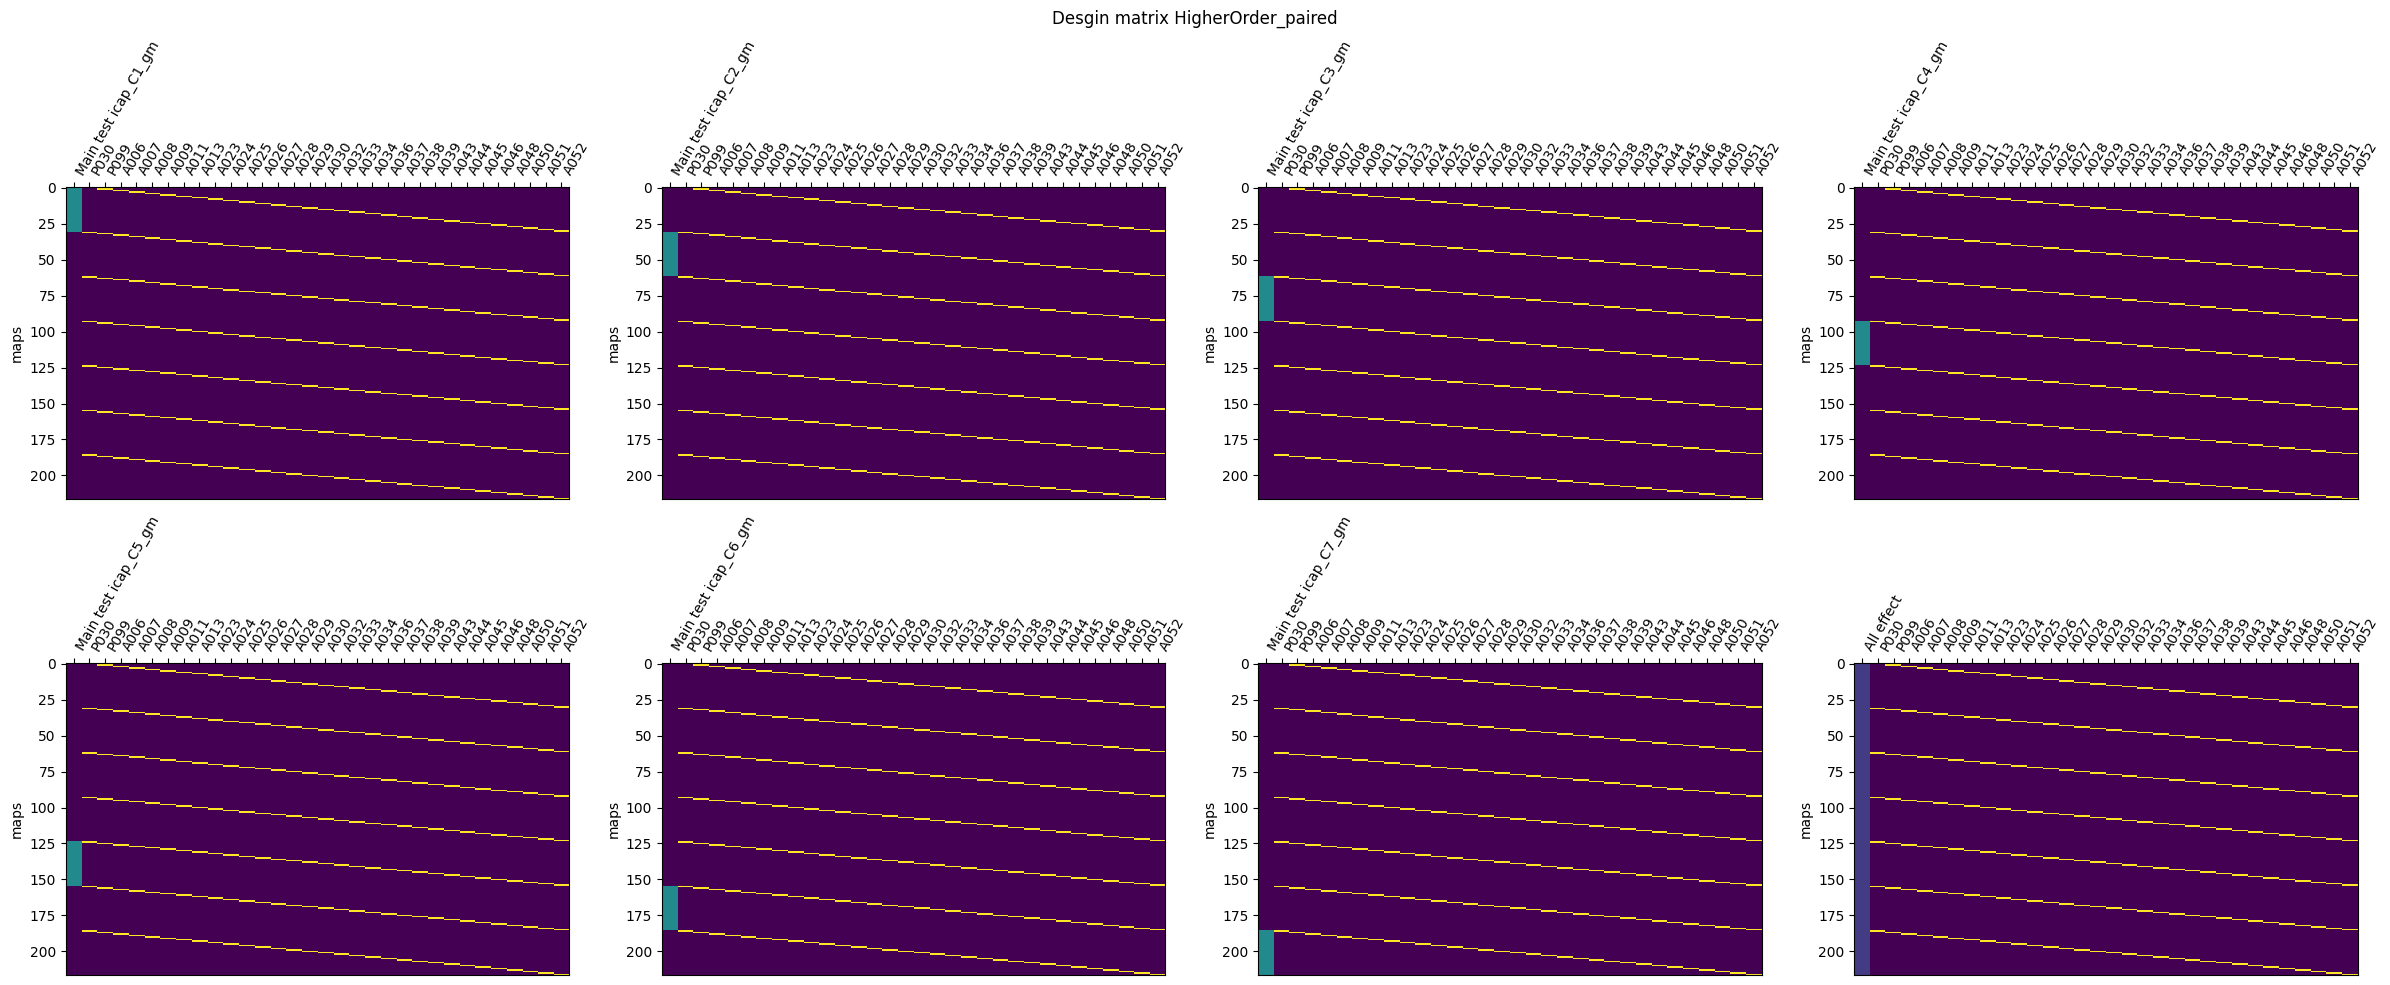

In [82]:
Design_matrix={}
for ana_name in ana2run:
    Design_matrix[ana_name]=stats[ana_name].design_matrix(plot_matrix= True,save_matrix=True) #contrast_name="4quad_9levels",


In [ ]:
import numpy as np
seed_names=["C1","C2","C3"]

contrasts={}
for seed_nb, seed in enumerate(seed_names):
    contrasts["Main test " + seed_names[seed_nb]]=np.hstack(([0] * len(config['list_subjects']) * seed_nb, [1] * len(config['list_subjects']), [0] * len(config['list_subjects'])* (len(seed_names)-(seed_nb+1))))
contrasts["C1 Effect"]=np.hstack(([1] * len(config['list_subjects']), [0] * len(config['list_subjects'])))
contrasts["C2 Effect"]=np.hstack(([0] * len(config['list_subjects']), [1] * len(config['list_subjects'])))
contrasts["C3 Effect"]=np.hstack(([0] * len(config['list_subjects']), [1] * len(config['list_subjects'])))
contrasts["C3 Effect"]=np.hstack((np.tile(([[1] * len(self.config['list_subjects'])+ [0] * len(self.config['list_subjects'])]),2)))
contrasts["C2 Effect"]  

In [16]:
#for ana_name in ana2run:
    #stats[ana_name].randomise(Design_matrix[ana_name],100)

## <font color=#B2D732> <span style="background-color: #4424D6"> C/ Create second level model and apply correction

In [83]:
maps_uncorr={}

for ana_name in ana2run:
    print(ana_name)
    # run parametric stat to estimate the threshold
    if not os.path.exists(""):#stats[ana_name].output_dir + "/uncorr/"):
        maps_uncorr[ana_name]=stats[ana_name].secondlevelmodel(Design_matrix[ana_name],plot_2ndlevel=False,save_img=True,parametric=True) #stats_1T.secondlevelmodel(Design_matrix_1T)
    
    # run non parametric stat to estimate the threshold
    #if not os.path.exists(""):#stats[ana_name].output_dir + "/nonparam/"):
     #   maps_uncorr[ana_name]=stats[ana_name].secondlevelmodel(Design_matrix[ana_name],plot_2ndlevel=False,save_img=True,parametric=False,estimate_threshold=False) #stats_1T.secondlevelmodel(Design_matrix_1T)
  

icap_alllevels_gm
Main test icap_C1_gm
Main test icap_C2_gm
Main test icap_C3_gm
Main test icap_C4_gm
Main test icap_C5_gm
Main test icap_C6_gm
Main test icap_C7_gm
All effect


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

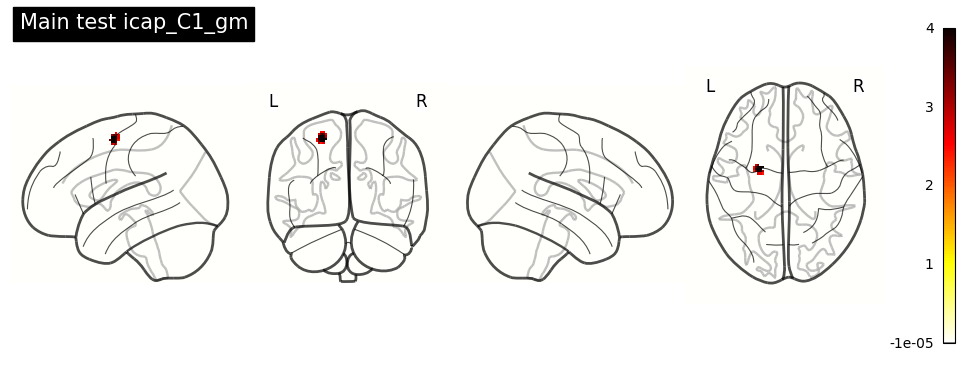

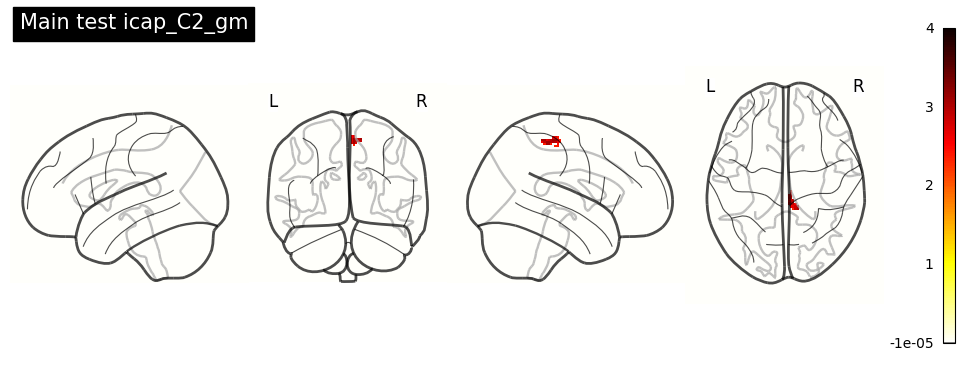

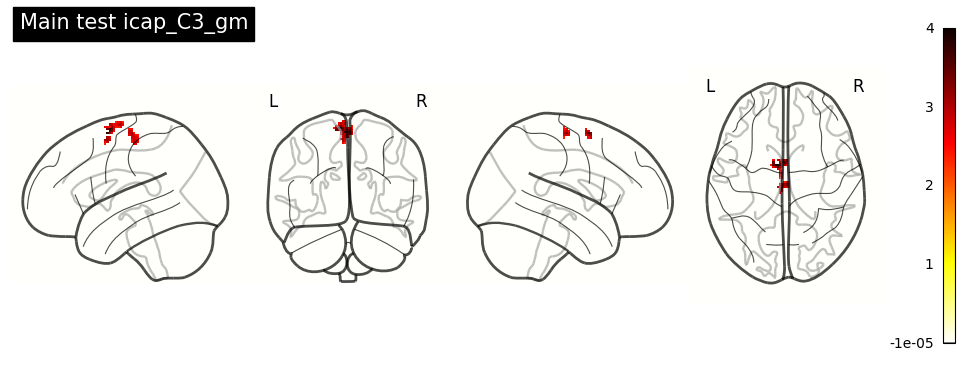

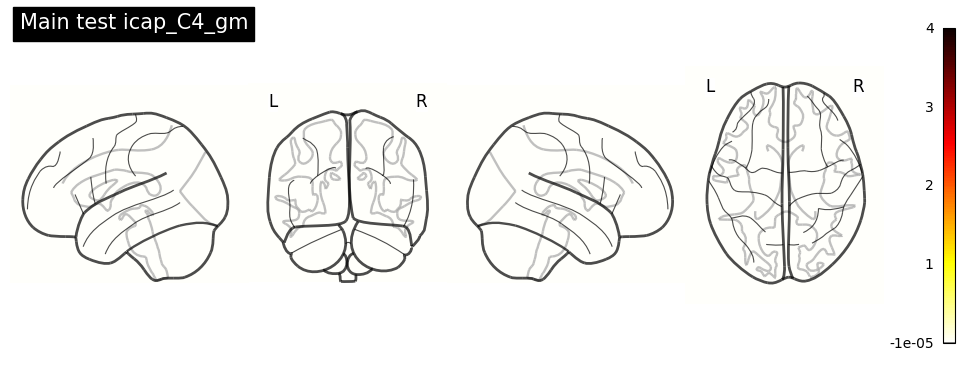

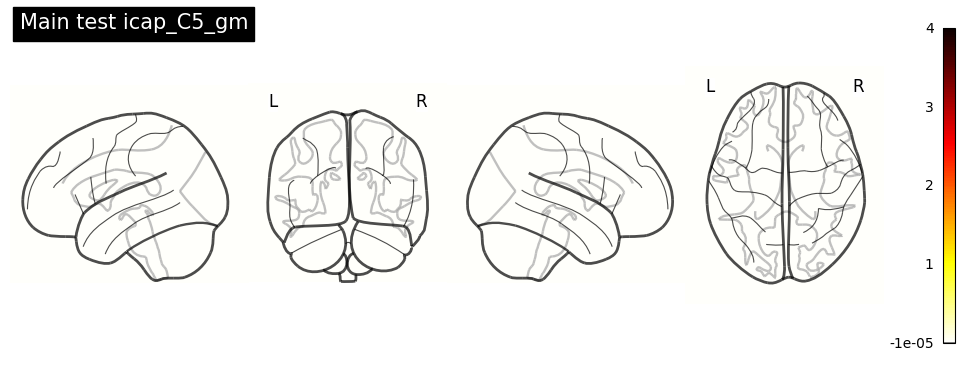

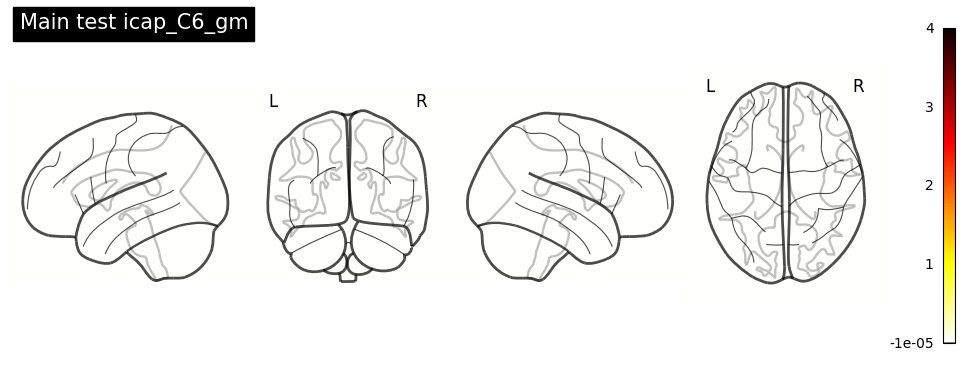

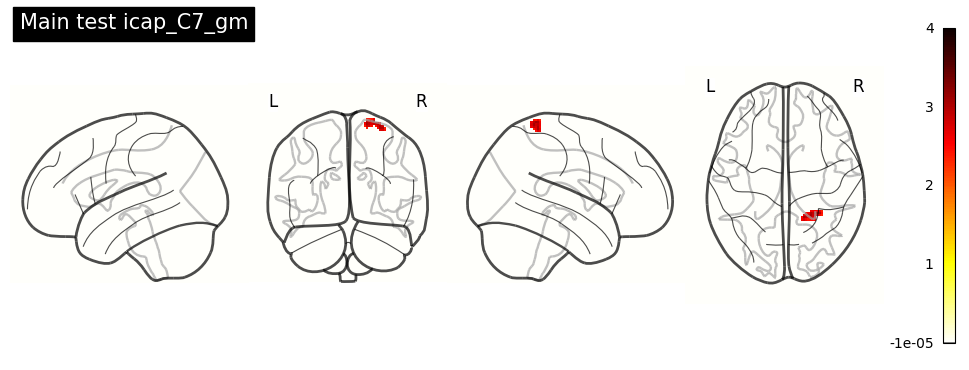

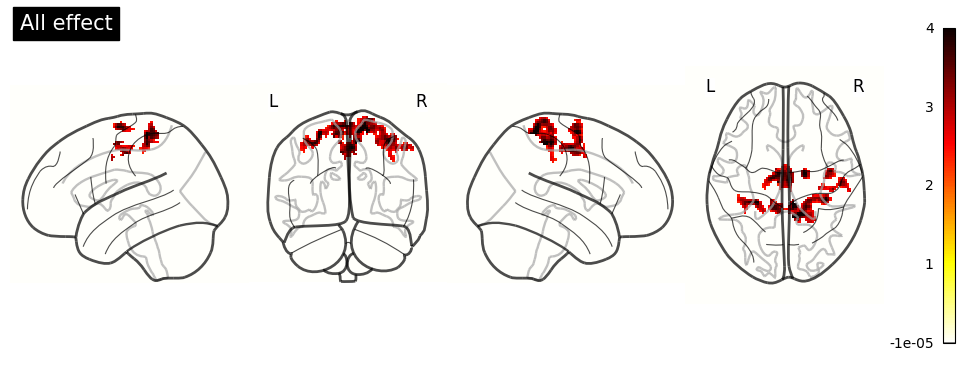

In [85]:
for ana_name in ana2run:
    stats[ana_name].secondlevel_correction(maps_uncorr[ana_name],z_thr=2.3,p_value=0.01,cluster_threshold=50,corr="fpr",plot_stats_corr=True,save_img=True) #stats_1T.secondlevelmodel(Design_matrix_1T)


## <font color=#B2D732> <span style="background-color: #4424D6"> D/ plot surface view

/export02/data/landelle/anaconda/envs/CL_brsc_fc_env/lib/python3.8/site-packages/nilearn/plotting/surf_plotting.py:430: UserWarning: You provided a non integer threshold but configured the colorbar to use integer formatting.
  warn("You provided a non integer threshold "
/export02/data/landelle/anaconda/envs/CL_brsc_fc_env/lib/python3.8/site-packages/nilearn/plotting/surf_plotting.py:430: UserWarning: You provided a non integer threshold but configured the colorbar to use integer formatting.
  warn("You provided a non integer threshold "
/export02/data/landelle/anaconda/envs/CL_brsc_fc_env/lib/python3.8/site-packages/nilearn/plotting/surf_plotting.py:430: UserWarning: You provided a non integer threshold but configured the colorbar to use integer formatting.
  warn("You provided a non integer threshold "
/export02/data/landelle/anaconda/envs/CL_brsc_fc_env/lib/python3.8/site-packages/nilearn/plotting/surf_plotting.py:430: UserWarning: You provided a non integer threshold but configured

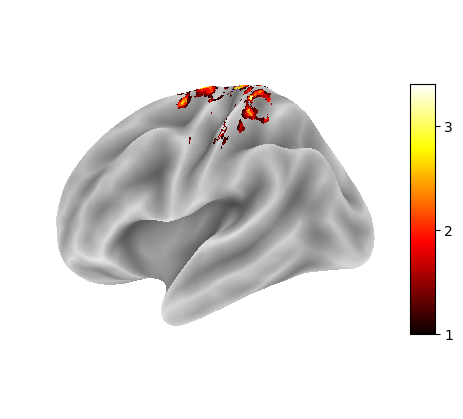

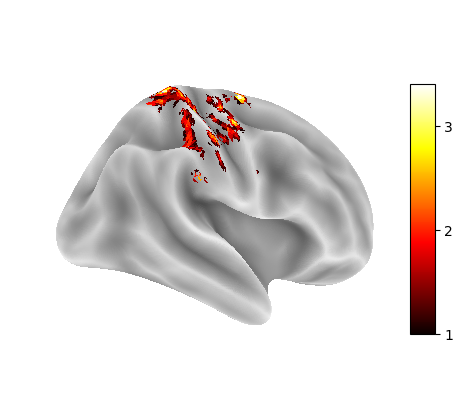

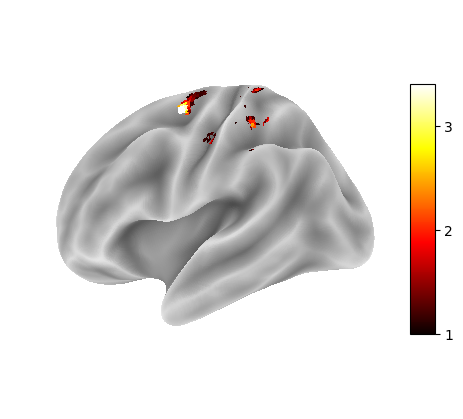

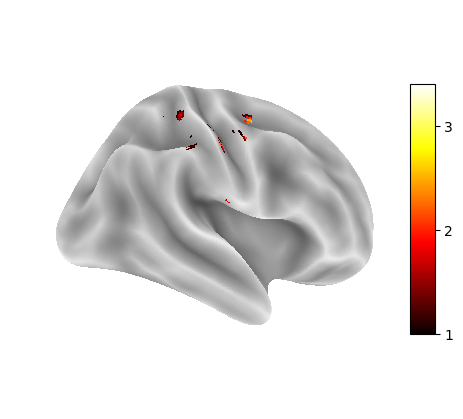

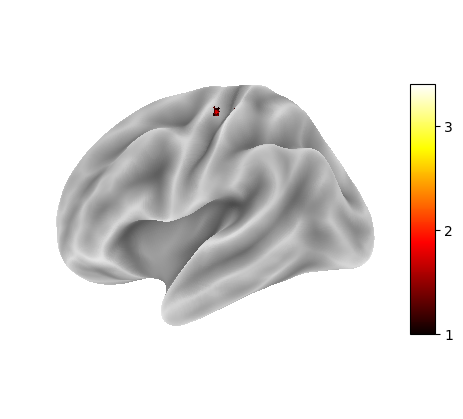

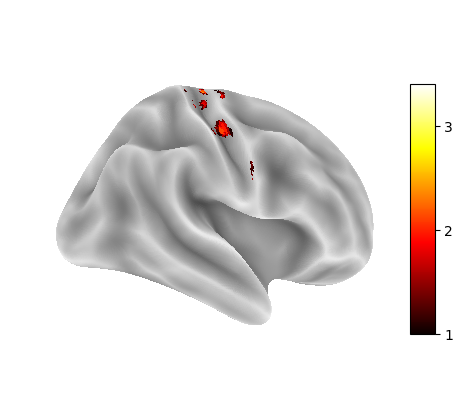

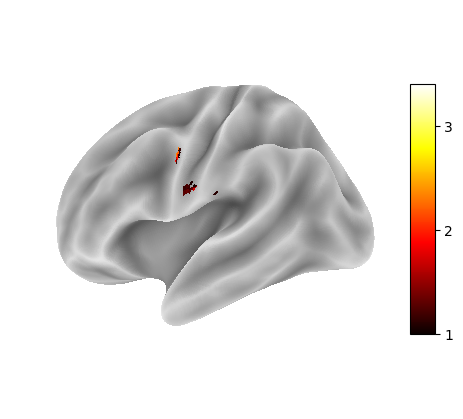

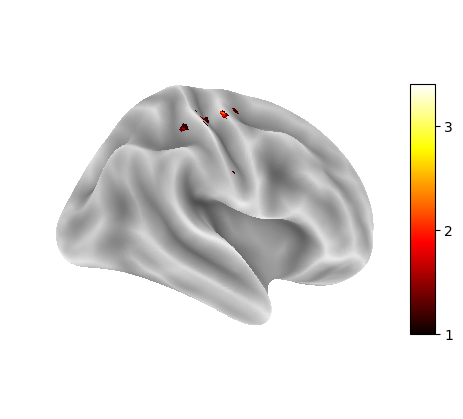

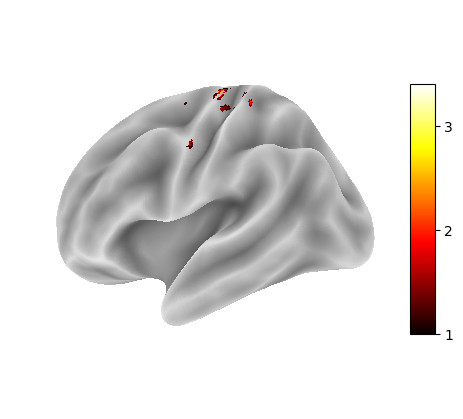

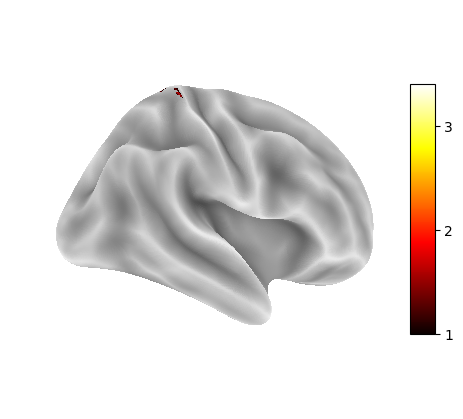

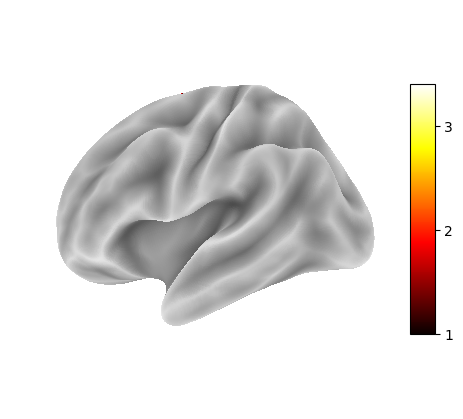

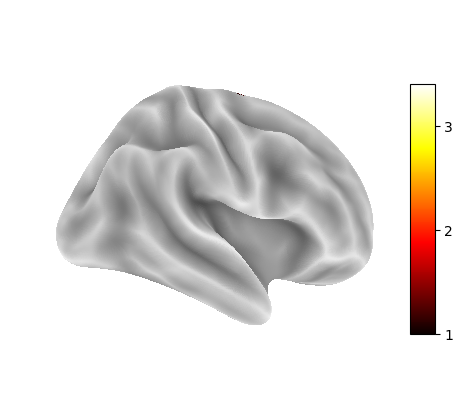

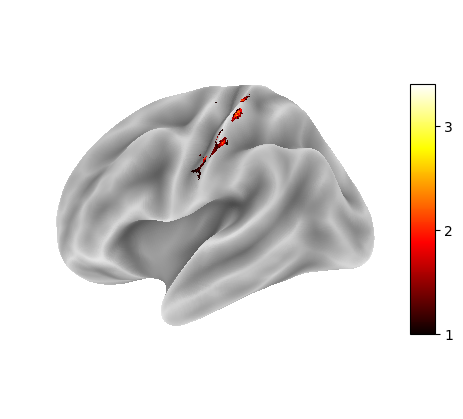

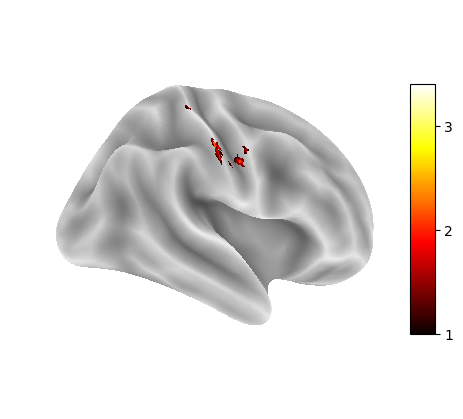

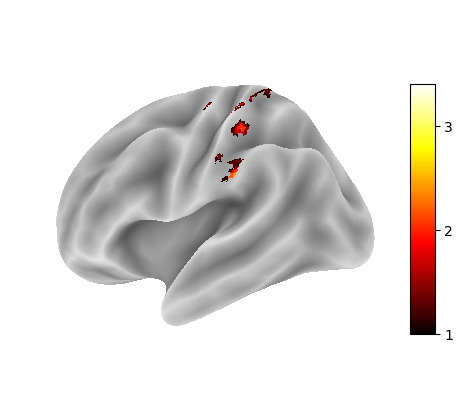

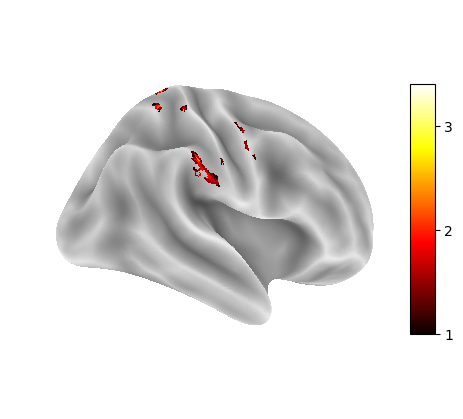

In [69]:
#mask_img=i_dir + "/masks/" + "iCAPs_"+network +".nii.gz"#i_dir + "gordon_SM_all.nii.gz"# # mask can help to avoid smoothing with 0 values
from plotting import Plot_brain
PlotBr=Plot_brain(config) # initialize the function
for seed in ["effect","C1_gm","C2_gm","C3_gm","C4_gm","C5_gm","C6_gm","C7_gm"]:
    main_dir=config["second_level"]+"/GLM/HigherOrder_paired/iCAPs_z_SMC_bin/Corr/icap_alllevels_gm/fpr_corrected/"

    image=glob.glob(main_dir + "/*" + seed + "*p05.nii.gz" )[0]

    PlotBr.plot_3D(i_img=image,hemi_view=["lh","rh"],face_view=["lateral"],
               vmin=1.6,vmax=4,
               mask_img=config["mask_path"],
                threshold=1.6,
               #colormap=discretized_colormap, 
               #tag=output_tag, 
               save_results=False)

In [69]:
main_dir + "/*clustere_p_tstat1*"

'/cerebro/cerebro1/dataset/bmpd/derivatives/HealthyControls_project/seed_to_voxels/29jan_2024/2_second_level//GLM/OneSampleT/iCAPs_z_SMC_bin_V1/Corr/i/randomise//*clustere_p_tstat1*'

In [38]:
norm.isf(0.05)

1.6448536269514729

In [ ]:
bmpd/derivatives/HealthyControls_project/seed_to_voxels/29jan_2024/2_second_level/GLM/OneSampleT/iCAPs_z_SMC_bin/Corr/icap_C6_gm/nonparam/logp_max_mass_icap_C6_gm.nii.gz

In [20]:
main_dir + "/nonparam/logp_max_mass*"

'/cerebro/cerebro1/dataset/bmpd/derivatives/HealthyControls_project/seed_to_voxels/29jan_2024/2_second_level//OneSampleT/iCAPs_z_SMC_bin/Corr/icap_C6_gm//nonparam/logp_max_mass*'

/cerebro/cerebro1/dataset/bmpd/derivatives/thibault_test/code/toolbox/bmpd_python/lib/python3.6/site-packages/nilearn/plotting/displays/_slicers.py:382: UserWarning: empty mask
  get_mask_bounds(new_img_like(img, not_mask, affine))


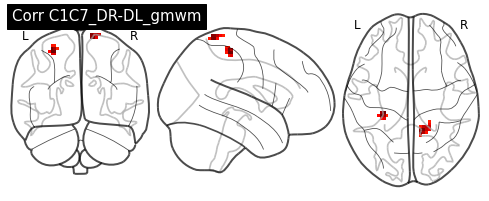

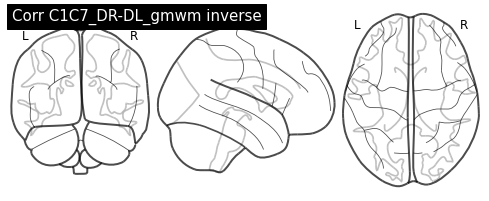

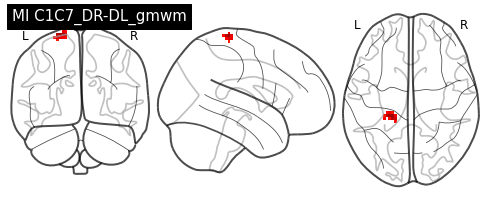

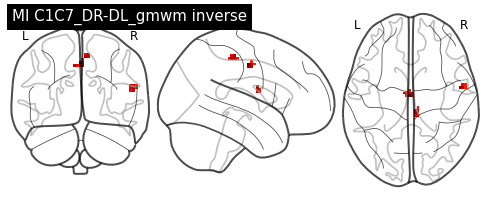

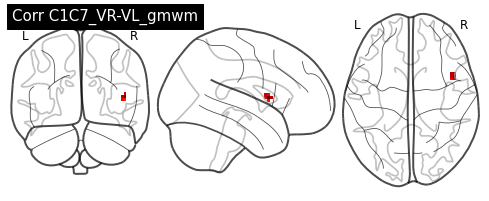

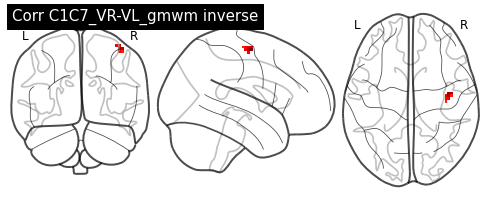

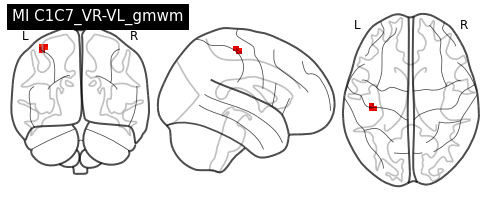

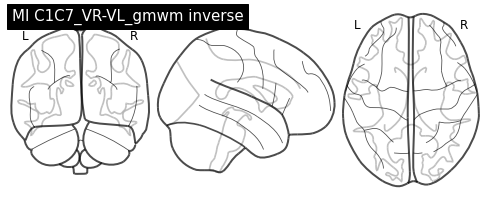

In [6]:
from nilearn import plotting
main_dir=config["second_level"]+"/TwoSampT_paired/MNI_GM_3mm_SMC/"
seeds=["C1C7_DR-DL_gmwm","C1C7_VR-VL_gmwm"]
measures=["Corr","MI"]
for seed in seeds:
    for measure in measures:
        image1=glob.glob(main_dir + "/" + measure + "/" + seed + "/fpr_corrected/"+ seed.split("-")[0] + "*fpr_p01.nii.gz")[0]
        image2=glob.glob(main_dir + "/" + measure + "/" + seed + "/fpr_corrected/C1C7_"+ seed.split("-")[-1] + "*fpr_p01.nii.gz")[0]

        plotting.plot_glass_brain(image1,threshold=0, vmax=4, title=measure + " " + seed)
        plotting.plot_glass_brain(image2,threshold=0, vmax=4, title=measure + " " + seed + " inverse")
